In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() 

# Reading The Data

In [5]:
df = pd.read_csv('tmdb-movies.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


# Describing The Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Removing The Coloums And Rows That Rre Empty

In [10]:
df.isna().sum()
#counting nulls in all coloums and know the total no

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
df.duplicated().sum()
#know duplicates and get the total no

1

In [12]:
df.drop_duplicates(inplace = True)
df
#remove the dublicates

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


# Get The Max Revenue Of All Movies

In [13]:
df[df["revenue"]==df["revenue"].max()]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


# Get The Min Revenue Of All Movies

In [14]:
df["revenue"]==df["revenue"].min()

0        False
1        False
2        False
3        False
4        False
         ...  
10861     True
10862     True
10863     True
10864     True
10865     True
Name: revenue, Length: 10865, dtype: bool

In [15]:
df[df["revenue"]==df["revenue"].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


# Get The Max Budget Of All Movies

In [16]:
df[df["budget"]==df["budget"].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0


# Get The Min Budget Of All Movies

In [17]:
df[df["budget"]==df["budget"].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


# Get The Max Number Of Counts Of All Movies

In [18]:
df[df["vote_count"]==df["vote_count"].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,2010,160000000.0,825500000.0


# Get The Min Number Of Counts Of All Movies

In [19]:
df[df["vote_count"]==df["vote_count"].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
240,363689,tt4229298,0.532700,0,0,The Unspoken,Jodelle Ferland|Sunny Suljic|Neal McDonough|Ma...,NaN,Sheldon Wilson,NaN,...,In 1997 the close-knit Anderson family vanishe...,90,Thriller|Horror,Lighthouse Pictures|Sapphire Fire Limited,10/24/15,10,4.1,2015,0.000000e+00,0.000000e+00
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,...,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.000000e+00,0.000000e+00
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,...,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.000000e+00,0.000000e+00
345,361263,tt4505830,0.342530,0,0,Jesse Stone: Lost in Paradise,Tom Selleck|William Devane|Gloria Reuben|Luke ...,http://www.hallmarkchannel.com/jesse-stone-los...,Robert Harmon,NaN,...,"Once a Los Angeles homicide detective, Police ...",87,Drama|TV Movie|Crime|Mystery,Sony Pictures Television,10/18/15,10,5.6,2015,0.000000e+00,0.000000e+00
386,316885,tt4180576,0.291244,0,0,Bridgend,Hannah Murray|Steven Waddington|Adrian Rawlins...,NaN,Jeppe RÃ¸nde,NaN,...,"Over a 5-year period in Bridgend in Wales, 79 ...",95,Drama,Blenkov & SchÃ¸nnemann Pictures|Four Sons Pict...,1/22/15,10,5.7,2015,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,54000,tt0077539,0.227338,6727000,0,Fedora,William Holden|Marthe Keller|Hildegard Knef|Jo...,NaN,Billy Wilder,Youth had been a habit of hers for so long tha...,...,An ambitious Hollywood hustler becomes involve...,114,Drama|Romance,SociÃ©tÃ© FranÃ§aise de Production (SFP),5/30/78,10,4.9,1978,2.248635e+07,0.000000e+00
10808,40060,tt0077904,0.129123,0,0,The Manitou,Tony Curtis|Michael Ansara|Susan Strasberg|Ste...,NaN,William Girdler,Evil does not dieâ€¦ It waits to be re-born!,...,A psychic's girlfriend finds out that a lump o...,104,Horror,Melvin Simon Productions|Mid-America Pictures|...,4/28/78,10,5.8,1978,0.000000e+00,0.000000e+00
10809,31428,tt0078295,0.128231,0,0,Someone's Watching Me!,Lauren Hutton|David Birney|Adrienne Barbeau|Le...,NaN,John Carpenter,NaN,...,A woman is being watched in her apartment by a...,97,Horror|Mystery|TV Movie|Thriller,Warner Bros. Television,11/27/78,10,5.7,1978,0.000000e+00,0.000000e+00
10812,31948,tt0077629,0.318883,0,5438927,Gray Lady Down,Charlton Heston|David Carradine|Stacy Keach|Ne...,NaN,David Greene,Trapped underwater... with time running out.,...,"The USS Neptune, a nuclear submarine, is sunk ...",111,Thriller|Adventure|History|Drama,Universal Pictures|The Mirisch Corporation,3/10/78,10,6.1,1978,0.000000e+00,1.818071e+07


# Get The Max Run Time Of All Movies

In [20]:
df[df["runtime"]==df["runtime"].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


# Get The Min Run Time Of All Movies

In [21]:
df[df["runtime"]==df["runtime"].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


# Number Of Movies In Each Year

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


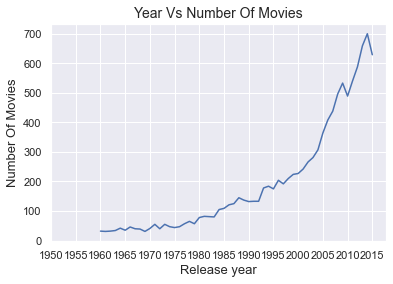

In [22]:
#group for each year and count the number of movies in each year 
data=df.groupby('release_year').count()['id']
print(data.tail())

#group of the data according to their release year and count the total number of movies in each year and pot.
data.plot(xticks = np.arange(1950,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

# Top 10 Profitable Movies

In [25]:
df['profit']==df['revenue']-df['budget']

0        True
1        True
2        True
3        True
4        True
         ... 
10861    True
10862    True
10863    True
10864    True
10865    True
Length: 10866, dtype: bool

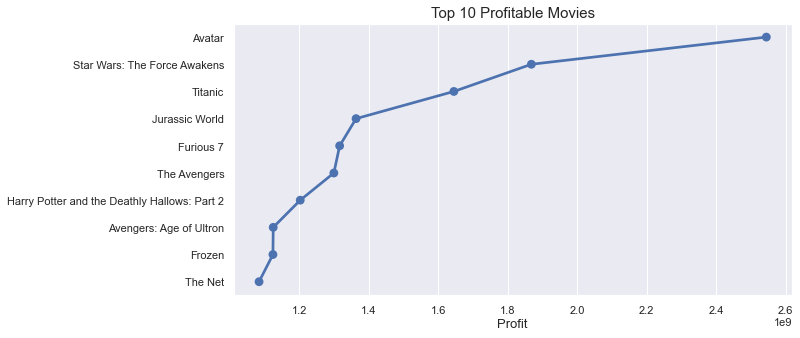

In [24]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()
df = pd.read_csv('tmdb-movies.csv')
df['profit']=df['revenue']-df['budget']
info = pd.DataFrame(df['profit'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['profit'][:10])
#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)
#setup the figure size
sns.set(rc={'figure.figsize':(20,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

# Count how many movie each director made


In [27]:
df["director"].value_counts()

Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: director, Length: 5067, dtype: int64

# Count how many movie with the name

In [29]:
df['original_title'].value_counts()

Hamlet                      4
The Black Hole              3
Shelter                     3
The Three Musketeers        3
Julia                       3
                           ..
Beneath the Darkness        1
The Veteran                 1
African Cats                1
Your Sister's Sister        1
Manos: The Hands of Fate    1
Name: original_title, Length: 10571, dtype: int64

# Top 10 highets rated movies.

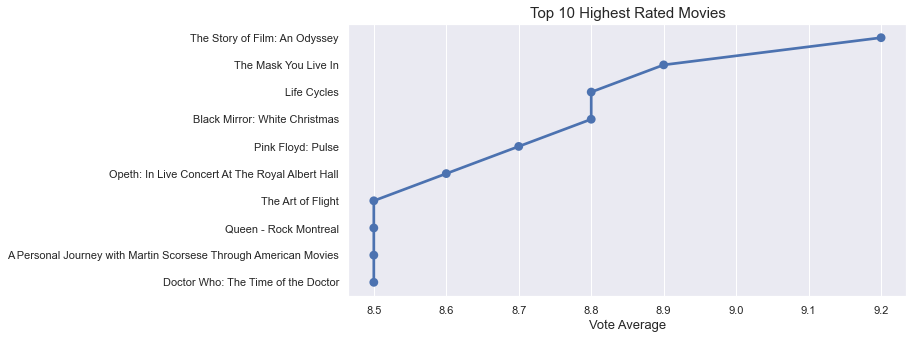

In [33]:
#sort the 'vote_average' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['vote_average'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(20,2)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

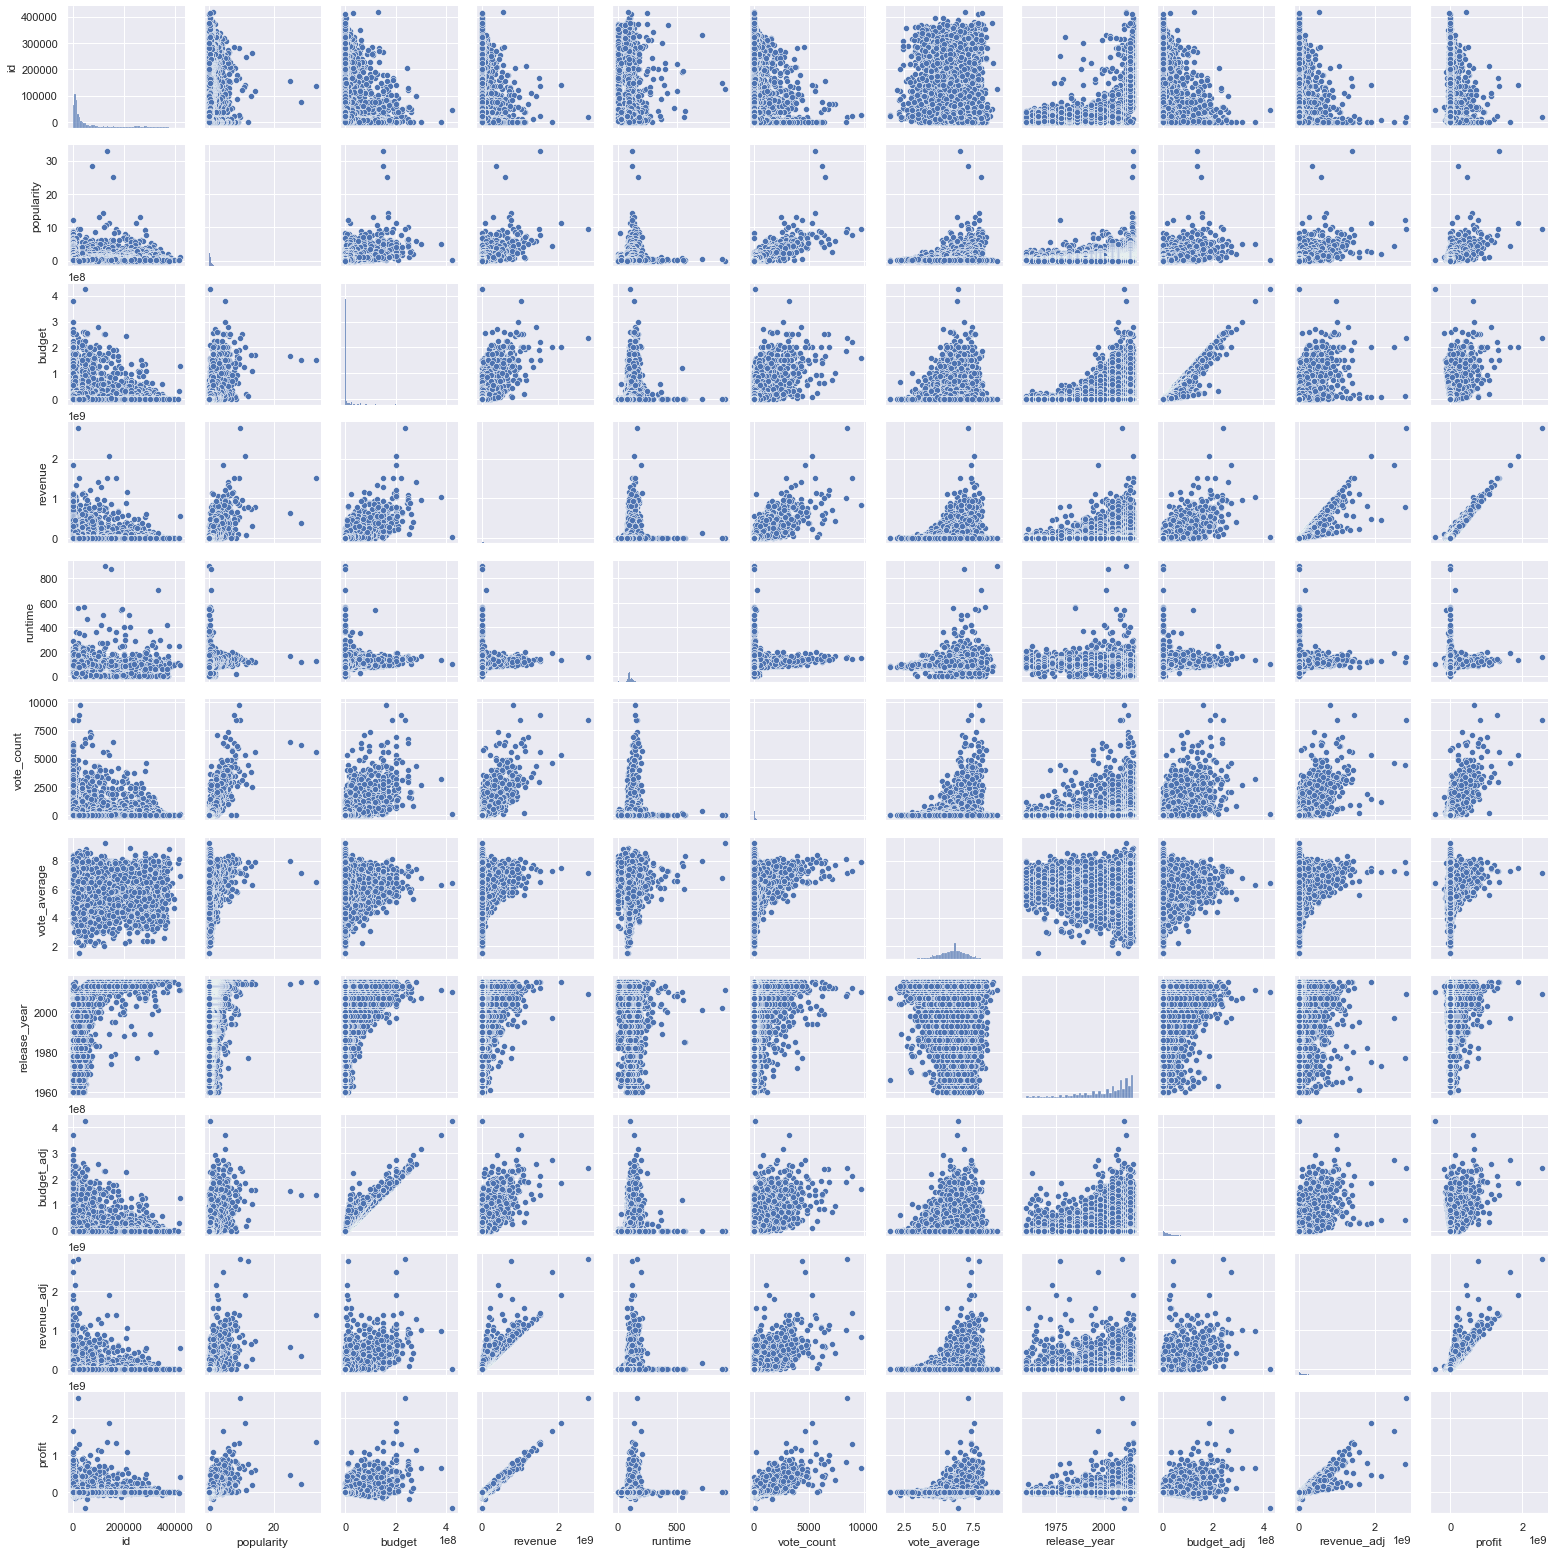

In [31]:
sns.pairplot(df,height=2)

# conclusion

from the sns plot by increasing the number of  years the profit increases too there's a directly propotional relationship between profit and the number of years

from sns plot there's a direct relationship between the budet and the release year so the budget in year 2000 is so much higher than the budget at year 1960

from sns plot as the budget increases over the years so the profit do the same as the budget

from sns plot as the top movies that has highest profit and revenue that has minimum runtime 

Woody Allen is the director that made most of the movies with a 45 number of movies 

Hamlet is the name of movie that get to 4 movies not only one 

year 2012 is the highest year with the most released movies  with 700 movie

An Odyssey is highest rated movie

Avatar has the maximum revenue

Mythica: The Necromancer,Ronaldo,Anarchy Parlor and 27 other movies has the smallest runtime

from sns plot the movies with average vote count has the highest revenue